# Clean data, handle missing values, encode categorical variables, feature engineering, Split train and test sets


# 2 Clean Data


In [6]:
pip install seaborn matplotlib pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import re
# Đọc dữ liệu
df = pd.read_csv('../data/raw_data.csv')

# Hàm chuyển từ bất kỳ chuỗi nào sang snake_case
def to_snake_case(s):
    # Loại bỏ khoảng trắng hai đầu, chuyển về lowercase
    s = s.strip().lower()
    # Thay mọi ký tự không phải chữ số/chữ thường bằng dấu gạch dưới
    s = re.sub(r'[^0-9a-z]+', '_', s)
    # Loại bỏ gạch dưới thừa ở đầu/cuối
    s = re.sub(r'^_|_$', '', s)
    return s

# Áp dụng cho tất cả cột
df.columns = [to_snake_case(col) for col in df.columns]

# Kiểm tra kết quả
print(df.columns.tolist())

['url', 'price', 'box_type', 'case_diameter', 'case_thickness', 'case_material', 'case_shape', 'case_back', 'band_material', 'band_type', 'band_color', 'clasp', 'dial_color', 'type', 'crystal', 'hands', 'dial_markers', 'second_markers', 'bezel', 'bezel_color', 'bezel_material', 'brand', 'collection_name', 'gender', 'model', 'watch_label', 'movement', 'engine', 'water_resistance', 'calendar', 'functions', 'watch_features', 'watch_style', 'warranty', 'jomashop_sku', 'department', 'category', 'crown', 'luminiscence', 'item_variation', 'power_reserve', 'additional_info', 'color', 'box', 'papers', 'band_width', 'sub_dials', 'upc_code', 'closure_type', 'preowned_item_condition', 'year', 'comments', 'band_length', 'case_color', 'size_info', 'brand_type', 'condition_description', 'material', 'launch_year']


In [9]:
# Check shape of the data
df.shape

(13884, 59)

In [1]:
# Check missing values and % data missing
print(df.isnull().sum() / df.shape[0] * 100)

NameError: name 'df' is not defined

In [ ]:
# Filter, Only Get rows with category 'Watches'
df_watches = df[df['category'] == 'Watches']
df = df_watches.copy()
df.shape

(9272, 59)

In [ ]:
df.to_csv('../data/cleaned_products.csv', index=False)

In [ ]:
# Ngưỡng 30% (threshold = 0.3): loại bỏ tất cả các cột có ≥ 30% giá trị thiếu.
# Các cột vượt ngưỡng:
# CASE_THICKNESS (44.6%)
# SECOND_MARKERS (40.5%)
# ENGINE (47.5%)
# CALENDAR (47.3%)
# CROWN (38.3%)
# CATEGORY (36.6%)
# WATCH_LABEL (30.5%)
# BEZEL_COLOR (31.1%)
# Ngưỡng 40% (threshold = 0.4): chỉ loại những cột missing ≥ 40%.
# CASE_THICKNESS, SECOND_MARKERS, ENGINE, CALENDAR
# Remove columns with more than 30% missing values
threshold = 0.45
missing_cols = df.columns[df.isnull().mean() > threshold]
print(f"Columns with more than {threshold * 100}% missing values: {missing_cols.tolist()}")
print(f"Remaining columns: {df.columns.difference(missing_cols).tolist()}")
df = df.drop(columns=missing_cols)
# Save cleaned data to a new csv file
df.to_csv('../data/cleaned_products.csv', index=False)

Columns with more than 45.0% missing values: ['luminiscence', 'item_variation', 'power_reserve', 'additional_info', 'color', 'box', 'papers', 'band_width', 'sub_dials', 'upc_code', 'closure_type', 'preowned_item_condition', 'year', 'comments', 'band_length', 'case_color', 'size_info', 'brand_type', 'condition_description', 'material', 'launch_year']
Remaining columns: ['band_color', 'band_material', 'band_type', 'bezel', 'bezel_color', 'bezel_material', 'box_type', 'brand', 'calendar', 'case_back', 'case_diameter', 'case_material', 'case_shape', 'case_thickness', 'category', 'clasp', 'collection_name', 'crown', 'crystal', 'department', 'dial_color', 'dial_markers', 'engine', 'functions', 'gender', 'hands', 'jomashop_sku', 'model', 'movement', 'price', 'second_markers', 'type', 'url', 'warranty', 'watch_features', 'watch_label', 'watch_style', 'water_resistance']


In [ ]:
### Get Most important features of a Clock

import pandas as pd

# Giả sử df là DataFrame gốc
cols = [
    'price',
    'case_material',
    'band_material',
    'case_back',
    'bezel_material',
    'brand',
    'gender',
    'movement',
    'watch_style',
    'case_diameter',
    'water_resistance',
    'case_thickness',
    'crystal',
    'hands',
    'dial_markers'
]

# Lấy ra subset
df_sub = df[cols].copy()
print(df_sub.columns)
df = df_sub.copy()
df.to_csv('../data/cleaned_products.csv', index=False)

Index(['price', 'case_material', 'band_material', 'case_back',
       'bezel_material', 'brand', 'gender', 'movement', 'watch_style',
       'case_diameter', 'water_resistance', 'case_thickness', 'crystal',
       'hands', 'dial_markers'],
      dtype='object')


In [ ]:
# Standardize price column, remove all record that missing price
df = df[df['price'].notna() & (df['price'].astype(str).str.strip() != '')].copy()
df['price'] = (
    df['price']
    .astype(str)
    .str.extract(r'([\d,]+\.?\d*)')[0]
)
df = df[df['price'].notna()].copy()
df['price'] = df['price'].str.replace(',', '').astype(float)
df.head()

,price,case_material,band_material,case_back,bezel_material,brand,gender,movement,watch_style,case_diameter,water_resistance,case_thickness,crystal,hands,dial_markers
0,534.0,Stainless Steel,Stainless Steel,Transparent,Stainless Steel,Tissot,Mens,Automatic,Casual,40 mm,100 meters / 330 feet,10.9 mm,Scratch Resistant Sapphire,Luminous Silver-tone,Index
1,534.0,Stainless Steel,Stainless Steel,Transparent,Stainless Steel,Tissot,Mens,Automatic,Casual,40 mm,100 meters / 330 feet,10.9 mm,Scratch Resistant Sapphire,Luminous Silver-tone,Index
2,27750.0,Titanium,Titanium,NaN,Titanium,Audemars Piguet,Mens,Automatic,Luxury,44 mm,NaN,NaN,Scratch Resistant Sapphire,Luminous,Index and Arabic numeral
3,88.0,Alloy,Leather,NaN,Alloy,Stuhrling Original,Mens,Quartz,Casual,42 mm,NaN,14 mm,NaN,Silver-tone,Arabic Numeral
4,9318.0,Stainless Steel,Stainless Steel Oyster,Solid,Stainless Steel,Rolex,Mens,Automatic,Luxury,40 mm,100 meters / 330 feet,12 mm,Scratch Resistant Sapphire,Silver-tone,Index


In [ ]:
# Check the shape of the data after cleaning
print(f"Shape of the data after cleaning: {df.shape}")

Shape of the data after cleaning: (9272, 15)


In [ ]:
# Save cleaned data to a new csv file
df.to_csv('../data/data_cleaned_v2.csv', index=False)

## Remove all columns that only have one unique value


In [ ]:
# Print unique values in each column
unique_counts = df.nunique()
print("Unique values in each column:")
print(unique_counts)

Unique values in each column:
price               3991
case_material        362
band_material        703
case_back             56
bezel_material       761
brand                200
gender                 3
movement               4
watch_style            9
case_diameter         50
water_resistance      64
case_thickness       478
crystal               85
hands                530
dial_markers         328
dtype: int64


In [ ]:
# Remove all columns that only have one unique value
df = df.loc[:, df.nunique() > 1]
print(f"Shape of the data after removing single unique value columns: {df.shape}")
df.to_csv('../data/data_cleaned.csv', index=False)

Shape of the data after removing single unique value columns: (9272, 15)


## Standardize Unit


In [ ]:
df = pd.read_csv('../data/data_cleaned.csv')
# Standardize Unit and remove all unit
cols_with_units = {
    'case_diameter': r'([\d\.]+)',                     # mm
    'water_resistance': r'([\d\.]+)',                  # meters
}

for col, regex in cols_with_units.items():
    # 1) Extract chuỗi số phù hợp
    df[col + '_num'] = df[col].astype(str).str.extract(regex)[0]
    
    # 2) Loại dấu phẩy (nếu có) rồi ép về float
    df[col + '_num'] = df[col + '_num'].str.replace(',', '').astype(float)

for col in list(cols_with_units):
    df = df.drop(columns=[col]).rename(columns={col + '_num': col})

# Kiểm tra kết quả
print(df[['case_diameter', 'water_resistance']].head())

   case_diameter  water_resistance
0           40.0             100.0
1           40.0             100.0
2           44.0               NaN
3           42.0               NaN
4           40.0             100.0


In [ ]:
df.to_csv('../data/data_cleaned.csv', index=False)

In [ ]:
# Check outliers in the all columns
def detect_outliers_iqr(df, unit_regex_map=None, multiplier=1.5):
    """
    Phát hiện outlier theo phương pháp IQR trên tất cả cột số:
    - unit_regex_map: dict mapping tên cột -> regex để extract số (ví dụ r'([\d\.]+)' cho '10.9 mm').
    - multiplier: hệ số nhân IQR (thường dùng 1.5).
    Trả về DataFrame summary với Q1, Q3, IQR, bounds và số outlier.
    """
    df_clean = df.copy()
    
    # 1. Nếu có map cột chứa đơn vị, extract và ép float
    if unit_regex_map:
        for col, regex in unit_regex_map.items():
            df_clean[col] = (
                df_clean[col].astype(str)
                .str.extract(regex)[0]             # lấy nhóm số
                .str.replace(',', '')              # bỏ dấu phẩy nếu có
            )
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    # 2. Tự động chọn cột số
    num_cols = df_clean.select_dtypes(include=['number']).columns
    
    # 3. Tính IQR và đếm outliers
    summary = []
    for col in num_cols:
        series = df_clean[col].dropna()
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower, upper = q1 - multiplier * iqr, q3 + multiplier * iqr
        outlier_count = series[(series < lower) | (series > upper)].shape[0]
        
        summary.append({
            'column': col,
            'Q1': q1,
            'Q3': q3,
            'IQR': iqr,
            'lower_bound': lower,
            'upper_bound': upper,
            'outliers_count': outlier_count
        })
    
    return pd.DataFrame(summary)

# Check outliers in the all numeric columns
num_cols = df.select_dtypes(include=['number']).columns
print("Numeric columns:")
print(num_cols.tolist())

# Check outliers from num_cols
unit_regex_map = {
    'case_diameter': r'([\d\.]+)',                     # mm
    'water_resistance': r'([\d\.]+)',                  # m
}
outlier_summary = detect_outliers_iqr(df, unit_regex_map=unit_regex_map)
print("Outlier summary:")
print(outlier_summary)

Numeric columns:
['price', 'case_diameter', 'water_resistance']
Outlier summary:
             column        Q1       Q3         IQR  lower_bound  upper_bound  \
0             price  243.8125  13250.0  13006.1875 -19265.46875  32759.28125   
1     case_diameter   34.0000     42.0      8.0000     22.00000     54.00000   
2  water_resistance   30.0000    100.0     70.0000    -75.00000    205.00000   

   outliers_count  
0            1103  
1             114  
2             565  


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vulin\AppData\Local\Temp\ipykernel_2268\1073002433.py:5: SyntaxWarning: invalid escape sequence '\d'
  - unit_regex_map: dict mapping tên cột -> regex để extract số (ví dụ r'([\d\.]+)' cho '10.9 mm').


# Encode Categorical Variables


In [ ]:
total_rows = len(df)
non_missing = df['price_segment'].notna().sum()
missing = df['price_segment'].isna().sum()
print(f"Tổng dòng: {total_rows}, Có phân khúc: {non_missing}, Không gán phân khúc: {missing}")


Tổng dòng: 9272, Có phân khúc: 9272, Không gán phân khúc: 0


C:\Users\vulin\AppData\Local\Temp\ipykernel_2268\4144996310.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')


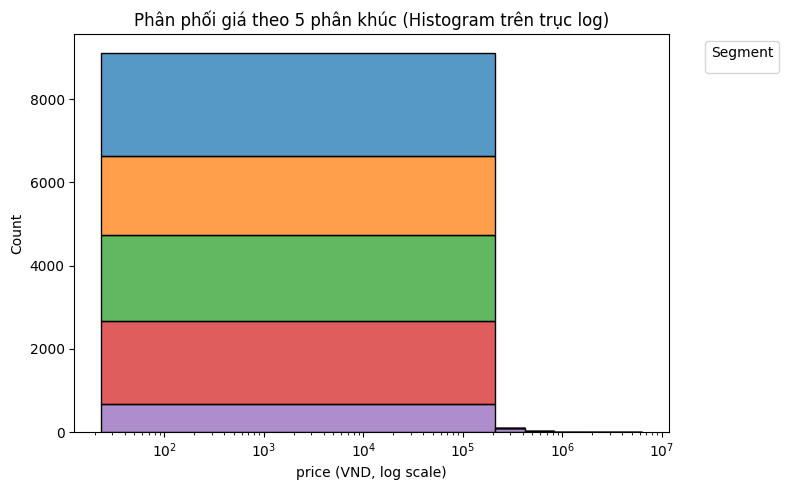

C:\Users\vulin\AppData\Local\Temp\ipykernel_2268\4144996310.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


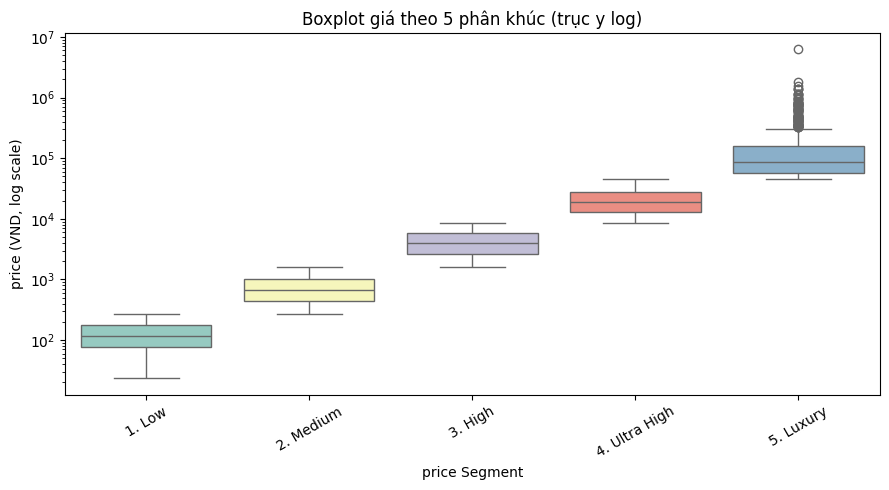

C:\Users\vulin\AppData\Local\Temp\ipykernel_2268\4144996310.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


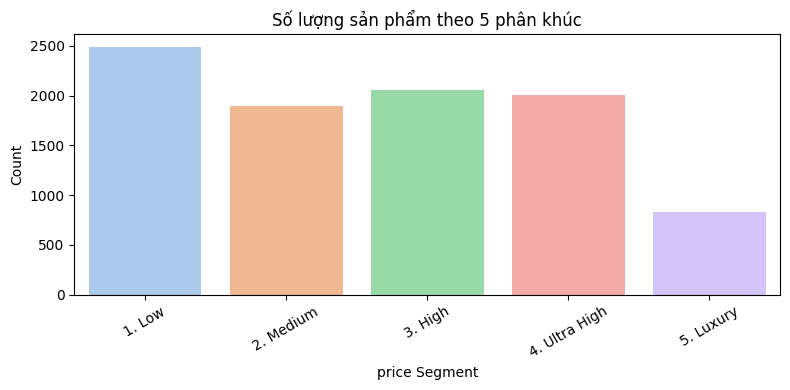

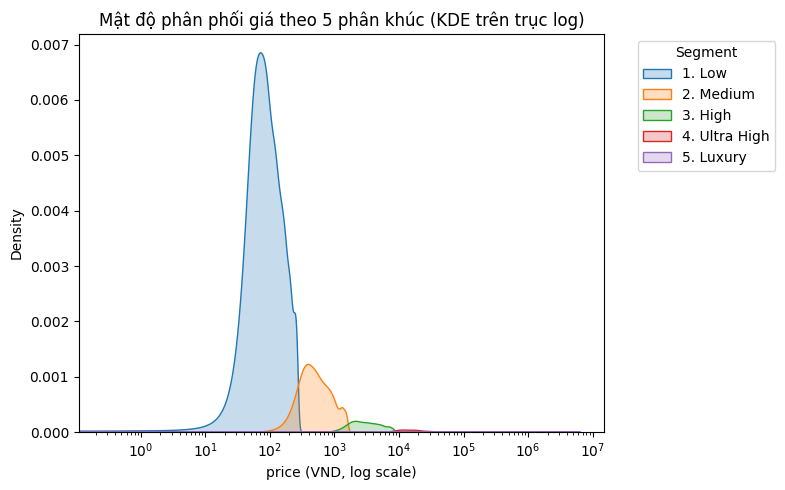

Khoảng giá thực tế (VND) cho mỗi phân khúc:
                          min        max
price_segment_logkm                     
1. Low                  23.40      272.0
2. Medium              273.76     1580.0
3. High               1584.00     8510.0
4. Ultra High         8535.00    44865.0
5. Luxury            44950.00  6267500.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

# 1. Đọc dữ liệu
df = pd.read_csv('../data/data_cleaned.csv')

# 2. Log-transform để làm mềm phân phối
#    log1p để tránh log(0) nếu có giá = 0
df['log_price'] = np.log1p(df['price'])

# 3. Phân cụm KMeans trên log_price
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
df['cluster_log'] = kmeans.fit_predict(df[['log_price']])

# 4. Tính log_price trung bình mỗi cluster rồi sắp xếp tăng dần
cluster_log_means = df.groupby('cluster_log')['log_price'].mean().sort_values()

# 5. Tạo nhãn có số thứ tự
labels = ['1. Low', '2. Medium', '3. High', '4. Ultra High', '5. Luxury']
cluster_log_map = {cluster: label for cluster, label in zip(cluster_log_means.index, labels)}

# 6. Ánh xạ cluster thành nhãn phân khúc có số
df['price_segment_logkm'] = df['cluster_log'].map(cluster_log_map)

# 7. Chuẩn bị thứ tự hiển thị trên biểu đồ
order_logkm = labels

# 8. Vẽ biểu đồ

# 8.1 Histogram (trục log)
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,
    x='price',
    hue='price_segment_logkm',
    bins=30,
    palette='tab10',
    multiple='stack',
    hue_order=order_logkm
)
plt.xscale('log')
plt.title("Phân phối giá theo 5 phân khúc (Histogram trên trục log)")
plt.xlabel("price (VND, log scale)")
plt.ylabel("Count")
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 8.2 Boxplot (trục log)
plt.figure(figsize=(9, 5))
sns.boxplot(
    data=df,
    x='price_segment_logkm',
    y='price',
    order=order_logkm,
    palette='Set3'
)
plt.yscale('log')
plt.title("Boxplot giá theo 5 phân khúc (trục y log)")
plt.xlabel("price Segment")
plt.ylabel("price (VND, log scale)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 8.3 Countplot (vẫn bình thường)
plt.figure(figsize=(8, 4))
sns.countplot(
    data=df,
    x='price_segment_logkm',
    order=order_logkm,
    palette='pastel'
)
plt.title("Số lượng sản phẩm theo 5 phân khúc")
plt.xlabel("price Segment")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 8.4 KDE Plot (trục log)
plt.figure(figsize=(8, 5))
for seg in order_logkm:
    sns.kdeplot(
        data=df[df['price_segment_logkm'] == seg]['price'],
        label=seg,
        fill=True
    )
plt.xscale('log')
plt.title("Mật độ phân phối giá theo 5 phân khúc (KDE trên trục log)")
plt.xlabel("price (VND, log scale)")
plt.ylabel("Density")
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 9. (Tuỳ chọn) In khoảng giá gốc min–max của mỗi phân khúc sau khi log-KMeans
ranges = df.groupby('price_segment_logkm')['price'] \
           .agg(['min','max'])
print("Khoảng giá thực tế (VND) cho mỗi phân khúc:")
print(ranges)


In [ ]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv('../data/data_cleaned.csv')

# Xem các giá trị duy nhất trong cột giới tính (để kiểm tra chính tả)
print(df['gender'].unique())

# Tính giá trung bình theo từng giới tính
average_price_by_gender = df.groupby('gender')['price'].mean()

# Hiển thị kết quả
print(average_price_by_gender)

['Mens' 'Unisex' 'Womens' nan]
gender
Mens      22602.314475
Unisex    28424.430143
Womens    15175.937535
Name: price, dtype: float64


In [ ]:
# Chuẩn hóa cột gender
df['gender'] = df['gender'].str.strip().str.upper()

# Tính giá trung bình theo từng giới tính
gender_target_map = df.groupby('gender')['price'].mean()

# In ra để kiểm tra
print(gender_target_map)

# Áp dụng target encoding
df['gender_encoded'] = df['gender'].map(gender_target_map)

# Kiểm tra kết quả
print(df[['gender', 'gender_encoded', 'price']].head())

gender
MENS      22602.314475
UNISEX    28424.430143
WOMENS    15175.937535
Name: price, dtype: float64
  gender  gender_encoded    price
0   MENS    22602.314475    534.0
1   MENS    22602.314475    534.0
2   MENS    22602.314475  27750.0
3   MENS    22602.314475     88.0
4   MENS    22602.314475   9318.0


In [ ]:
print(df.shape)

(9272, 16)


In [ ]:
df.to_csv('../data/data_cleaned.csv', index=False)

In [ ]:
# Encoding Case Material
case_material_target_map = df.groupby('case_material')['price'].mean()

# In ra phiên bản sort của case_material_target_map
case_material_target_map_sorted = case_material_target_map.sort_values(ascending=False)
print("Case Material Target Map (sorted):")
print(case_material_target_map_sorted)

Case Material Target Map (sorted):
case_material
Baguette Diamond-Set 18kt White Gold                 1260040.00
18kt White Gold set with 22 baguette-cut diamonds    1065360.00
Diamond-Encrusted 18kt White Gold                     868645.00
18kt White Gold with 182 pcs Baguette Diamonds        810750.00
Carbon TPT                                            787750.00
                                                        ...    
Polished Finish Alloy                                     49.99
Stainless Steel set with Swarovski Crystals               46.86
(Translucent) Plastic                                     45.50
Black Velvet-covered Stainless Steel                      44.80
Pink Velvet-covered Stainless Steel                       44.80
Name: price, Length: 362, dtype: float64


In [ ]:
# Áp dung target encoding cho CASE_MATERIAL
df['case_material_encoded'] = df['case_material'].map(case_material_target_map)
print("Case Material Target Encoding Applied:")
print(df[['case_material', 'case_material_encoded', 'price']].head())

Case Material Target Encoding Applied:
     case_material  case_material_encoded    price
0  Stainless Steel            4311.533021    534.0
1  Stainless Steel            4311.533021    534.0
2         Titanium           49962.313106  27750.0
3            Alloy             110.988151     88.0
4  Stainless Steel            4311.533021   9318.0


In [ ]:
# Get float values from case_thickness ignoring units
case_thickness_regex = r'([\d\.]+)'  # Regex để lấy số thực
df['case_thickness'] = df['case_thickness'].astype(str).str.extract(case_thickness_regex)[0]
# Convert case_thickness to float, handling errors
df['case_thickness'] = pd.to_numeric(df['case_thickness'], errors='coerce')
# Kiểm tra 20 dòng đầu tiên
print("First 20 rows of case_thickness after extraction and conversion:")
print(df['case_thickness'].head(20))

# Case Thickness filled missing values with mean
case_thickness_mean = df['case_thickness'].mean()
df['case_thickness'] = df['case_thickness'].fillna(case_thickness_mean)
# Kiểm tra 20 dòng đầu tiên sau khi điền giá trị trung bình
print("First 20 rows of case_thickness after filling missing values with mean:")
print(df['case_thickness'].head(20))

First 20 rows of case_thickness after extraction and conversion:
0     10.9
1     10.9
2      NaN
3     14.0
4     12.0
5      NaN
6      NaN
7      8.5
8     14.4
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15    16.0
16     9.0
17     NaN
18     NaN
19    12.0
Name: case_thickness, dtype: float64
First 20 rows of case_thickness after filling missing values with mean:
0     10.900000
1     10.900000
2     11.196182
3     14.000000
4     12.000000
5     11.196182
6     11.196182
7      8.500000
8     14.400000
9     11.196182
10    11.196182
11    11.196182
12    11.196182
13    11.196182
14    11.196182
15    16.000000
16     9.000000
17    11.196182
18    11.196182
19    12.000000
Name: case_thickness, dtype: float64


Price
Giá bán (hoặc niêm yết) của đồng hồ, thường là giá thực tế bạn muốn dự đoán hoặc phân khúc.

CASE_MATERIAL
Vật liệu chế tác vỏ đồng hồ (case). Ví dụ: Thép không gỉ, Titanium, Vàng, Gốm ceramic, Đồng (Bronze)…

Band Material
Vật liệu dây đeo (strap/bracelet). Ví dụ: Da, Cao su (Rubber), Thép không gỉ, Nylon (NATO), Silicone…

Case Back
Kiểu lưng vỏ đồng hồ:

“Solid” (đặc)

“Exhibition” (kính trong, lộ máy)

“Screw-down” (vặn vít)

“Snap-on” (bấm)

BEZEL MATERIAL
Vật liệu vành bezel (vành xoay hoặc cố định) quanh mặt kính. Ví dụ: Nhôm, Gốm ceramic, Thép không gỉ, Vàng…

BRAND
Thương hiệu (Rolex, Omega, Seiko, Casio…). Yếu tố quan trọng quyết định phần lớn giá trị và uy tín.

GENDERS
Đối tượng hướng tới: “Men’s” (nam), “Women’s” (nữ) hoặc “Unisex” (cả hai).

MOVEMENT
Loại máy bên trong:

Quartz (pin)

Automatic (tự động lên dây)

Manual (lên dây tay)

Solar (năng lượng mặt trời)

Kinetic (cơ – điện)…

WATCH STYLE
Phong cách thiết kế: Diver (lặn), Dress (formal), Chronograph (bấm giờ), Pilot (phi công), Field (đồng hồ quân đội), Smartwatch, Skeleton (lộ máy)…

CASE DIAMETER
Đường kính vỏ đồng hồ (tính qua mặt số) tính bằng millimeter (mm).

WATER RESISTANCE
Khả năng chịu nước, thường thể hiện bằng mét (m) hoặc ATM (atmospheres). Ví dụ: 30 m, 100 m, 300 m…

CASE THICKNESS
Độ dày vỏ (từ đáy đến mặt kính) tính bằng millimeter (mm).


In [ ]:
df.to_csv('../data/data_cleaned.csv', index=False)

In [ ]:
df = pd.read_csv('../data/data_cleaned.csv')

In [ ]:
# Filled missing values of water_resistance with 
water_resistance_mean = df['water_resistance'].mean()
water_resistance_std = df['water_resistance'].std()
df['water_resistance'] = df['water_resistance'].fillna(water_resistance_mean)

In [ ]:
# Filled Case Diameter with mean
case_diameter_mean = df['case_diameter'].mean()
df['case_diameter'] = df['case_diameter'].fillna(case_diameter_mean)

In [ ]:
# Compare min max, mean, std of Case Back and sort by mean
case_back_stats = df.groupby('case_back')['price'].agg(['min', 'max', 'mean', 'std']).sort_values(by='mean', ascending=False)
print("Case Back Statistics:")
print(case_back_stats)

Case Back Statistics:
                                                          min         max  \
case_back                                                                   
Transparent sapphire                                627125.00   627125.00   
Skeleton Transparent                                  9055.00   776440.00   
Sapphire Crystal Display                              7715.00   245810.00   
Transparent Sapphire Glass                          111260.00   111260.00   
Skeleton                                                76.99  1084165.00   
Exhibition See Through                               20555.00   262775.00   
Sapphire-crystal case back                           99525.00    99525.00   
Sapphire-crystal                                     67730.00   113275.00   
Skeleton Transparent Exhibition See Through            724.99   613410.00   
Transparent (See Through)                             5795.00   186525.00   
Interchangeable                                      5

In [ ]:
df = df.drop(columns=['case_back'])

In [ ]:
df.to_csv('../data/data_cleaned.csv', index=False)

In [ ]:
# Remove các row có missing values
df = df.dropna()
# Kiểm tra lại shape của dữ liệu
print(f"Shape of the data after removing rows with missing values: {df.shape}")
# Lưu lại dữ liệu đã được làm sạch
df.to_csv('../data/data_cleaned.csv', index=False)

Shape of the data after removing rows with missing values: (7141, 17)


In [ ]:
df.to_csv('../data/data_cleaned.csv', index=False)

In [ ]:
# 1. Đọc dữ liệu
df = pd.read_csv("../data/data_cleaned.csv")

# 2. Xóa 2 cột
df = df.drop(columns=[
    "gender_encoded",
    "case_material_encoded"
])

# 3. Ghi file mới (ghi đè)
df.to_csv("../data/data_cleaned.csv", index=False)

print("Đã xóa 2 cột và lưu file thành công.")

Đã xóa 2 cột và lưu file thành công.
